<a href="https://colab.research.google.com/github/HolyMuchii/ProcesamientoImagenesTPs/blob/main/TP6/TP6_Murilo_Alves_Lima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementar un aplicativo que levante una imagen en nivel de gris (o que la convierta a YIQ y retenga solo el Y) y aplique el filtrado por convolución para los siguientes filtros:
1. Pasabajos: Plano y Bartlett 3x3, 5x5, 7x7. Gaussiano 5x5 y 7x7.
2. Detectores de bordes: Laplaciano v4 y v8. Sobel las 8 orientaciones.
3. Pasabanda, pasaaltos de frecuencia de corte 0,2 y 0,4

Respecto del “cierre” de la imagen cerca de los bordes, implementar la técnica no matemáticamente perfecta de “repetir” artificialmente filas o columnas cuando estas hagan falta. Por ejemplo, si el kernel es 3x3 y estoy en la primera columna, y no hay ninguna columna a la izquierda, entonces repito la primera columna como si estuviese en la imagen original. Otra opción es la conocida como padding en la cual adicionamos filas y columnas de ceros en los extremos de la imagen, similar al que les mostré para hacer que dos imágenes tengan el mismo tamaño.

Deben mostrar el aplicativo que permita cargar o seleccionar la imagen y elegir de una lista el filtro a aplicar ver su resultado. Adicionalmente deben mostrar un plot con todos los filtros aplicados para la imagen de entrada.
Nota: La función de convolución debe ser desarrollada por ustedes, NO mediante funciones de biblioteca.

Fecha de Entrega: 05 de Noviembre.
Saludos,
Steven


Implemente um aplicativo que aumente uma imagem em nível de cinza (ou que a converta em YIQ e retenha apenas o Y) e aplique a filtragem de convolução para os seguintes filtros:
1. Low Pass: Flat e Bartlett 3x3, 5x5, 7x7. Gaussiano 5x5 e 7x7.
2. Detectores de borda: Laplaciano v4 e v8. Sobel as 8 orientações.
3. Passa de banda, passa alta de frequência de corte 0,2 e 0,4

Com relação ao "fechamento" da imagem próximo às bordas, implemente a técnica não matematicamente perfeita de "repetir" artificialmente linhas ou colunas quando necessário. Por exemplo, se o kernel é 3x3 e eu estou na primeira coluna, e não há nenhuma coluna à esquerda, então repito a primeira coluna como se estivesse na imagem original. Outra opção é conhecida como preenchimento, no qual adicionamos linhas e colunas de zeros nas extremidades da imagem, semelhante ao que mostrei para fazer duas imagens com o mesmo tamanho.

Devem mostrar a aplicação que permite carregar ou selecionar a imagem e escolher o filtro a aplicar a partir de uma lista, ver o seu resultado. Além disso, eles devem mostrar um gráfico com todos os filtros aplicados para a imagem de entrada.

Nota: A função de convolução deve ser desenvolvida por você, NÃO por funções de biblioteca.

Data de entrega: 05 de novembro.

Saudações,
Steven

In [1]:
!git clone https://github.com/HolyMuchii/ProcesamientoImagenesTPs.git

Cloning into 'ProcesamientoImagenesTPs'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 65 (delta 22), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (65/65), done.


In [2]:
import imageio as io
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def image_to_rgb (image):
  r = image[:,:,0]
  g = image[:,:,1]
  b = image[:,:,2]
  return r,g,b

def rgb_to_yiq (r,g,b):
  y = (0.299*r + 0.587*g + 0.114*b)/255
  i = (0.595716*r - 0.274453*g - 0.321263*b)/255
  q = (0.211456*r - 0.522591*g + 0.311135*b)/255
  return y,i,q

def yiq_clip (y,i,q):
  y2 = np.clip(y,0,1)
  i2 = np.clip(i,-0.5957,0.5957)
  q2 = np.clip(q,-0.5226,0.5226)
  return y2,i2,q2

def adapt_image_to_kernel(y,kernel):
  mi = (len(kernel[0])-1)/2
  ni = (len(kernel[1])-1)/2
  ms = ((len(kernel[0])-1)/2)+len(y[:,0])-1
  ns = ((len(kernel[1])-1)/2)+len(y[0])-1
  imagek = np.zeros(((y.shape[0]+kernel.shape[0]-1),(y.shape[1]+kernel.shape[1]-1)))
  for m in range(imagek.shape[0]):
    for n in range(imagek.shape[1]):
      if m < mi or n < ni or m > ms or n > ns:
        imagek[m,n] = 0
      else:
        imagek[m,n] = y[m - int(mi), n - int(ni)]
  imagek[0:int(mi),] = imagek[int(mi),:]
  imagek[int(mi)+y.shape[0]:imagek.shape[0],] = imagek[int(mi)+y.shape[0]-1,]
  for s in range(int(ni)):
    imagek[:,int((ni)-1)- s ] = imagek[:,int(ni)]
    imagek[:,int(ni)+y.shape[1] + s ] = imagek[:,int(ni)+y.shape[1]-1]
  return imagek

def convolution_image(image,kernel):
  ic = image.shape[0] - (kernel.shape[0]-1)
  jc = image.shape[1] - (kernel.shape[1]-1)
  imagec = np.zeros((ic,jc))
  for i in range(ic):
    for j in range(jc):
      imagesize = image[i:i+kernel.shape[0],j:j+kernel.shape[1]]
      imagec[i,j] = np.sum(imagesize *kernel)
  return imagec
  


## Elija la imagen deseada

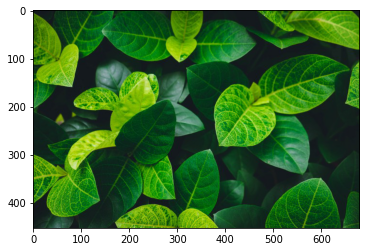

In [10]:
Diretorio_da_Imagem = 'https://super.abril.com.br/wp-content/uploads/2019/12/supawat-kampanna_eyeem_gettyimages_plantas-sons-estressadas.jpg?quality=90&strip=info&resize=680,453' #@param {type:"string"}
image01 = io.imread(Diretorio_da_Imagem)
# image01 = io.imread("ProcesamientoImagenesTPs/IMG_0616.JPG") # Imagen de Muestra con Tamaño (3456, 5184) 
plt.imshow(image01)

### Gradientes grises disponibles

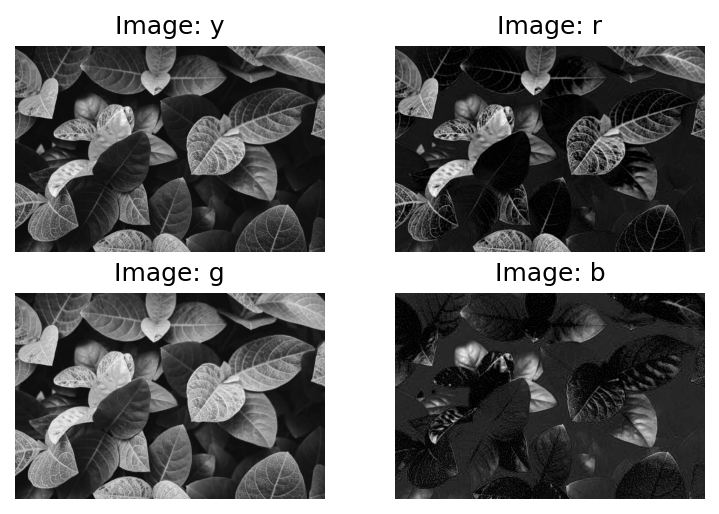

In [11]:
r,g,b = image_to_rgb(image01)
y,i,q = rgb_to_yiq(r,g,b)
y,i,q = yiq_clip(y,i,q)

fig,ax = plt.subplots(2,2, dpi=150)

ax[0,0].imshow(y,'gray')
ax[0,0].set_title('Image: y')
ax[0,0].axis('off')

ax[0,1].imshow(r,'gray')
ax[0,1].set_title('Image: r')
ax[0,1].axis('off')

ax[1,0].imshow(g,'gray')
ax[1,0].set_title('Image: g')
ax[1,0].axis('off')

ax[1,1].imshow(b,'gray')
ax[1,1].set_title('Image: b')
ax[1,1].axis('off')

plt.show()

## Bandas Disponibles para Convolución

### Pasa Bajo

- Pulso  - (3x3);(5x5);(7x7)
- Bartlett - (3x3);(5x5);(7x7)
- Gaussiano - (3x3);(5x5);(7x7)

Text(0.5, 1.0, 'Convolucion de la Imagen - Pasa Baja')

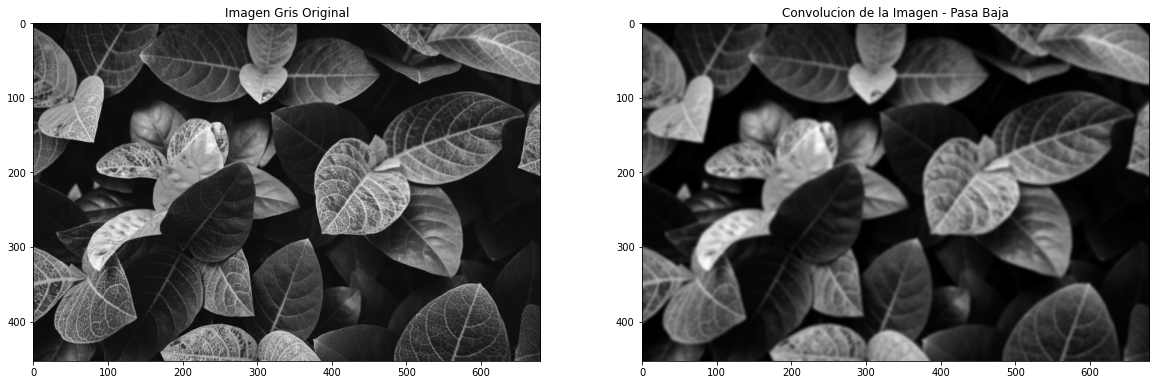

In [23]:
#@title Selecccione una Pasa Baja. { run: "auto" }
Image = "y" #@param ['y','r','g','b']
Type_Kernel = "Bartlett" #@param ['Pulso','Bartlett','Gaussiano']
size = 7 #@param {type:"slider", min:3, max:7, step:2}
if Type_Kernel in 'Pulso':
  kernel = np.ones((size,size))*(1/size**2)
elif Type_Kernel in 'Bartlett':
  size = str(size)
  if size in '3':
    kernel = np.array([1,2,1])*(np.array([[1],[2],[1]]))*(1/(4**2))
  elif size in '5':
    kernel = np.array([1,2,3,2,1])*(np.array([[1],[2],[3],[2],[1]]))*(1/(9**2))
  elif size in '7':
    kernel = np.array([1,2,3,4,3,2,1])*(np.array([[1],[2],[3],[4],[3],[2],[1]]))*(1/(16**2)) 
elif Type_Kernel in 'Gaussiano':
  size = str(size)
  if size in '3':
    kernel = np.array([1,2,1])*(np.array([[1],[2],[1]]))*(1/(4**2))
  elif size in '5':
    kernel = np.array([1,4,6,4,1])*(np.array([[1],[4],[6],[4],[1]]))*(1/(16**2))
  elif size in '7':
    kernel = np.array([1,6,15,20,15,6,1])*(np.array([[1],[6],[15],[20],[15],[6],[1]]))*(1/(64**2))

if Image in 'y':
  image = y
elif Image in 'r':
  image = r
elif Image in 'g':
  image = g
elif Image in 'b':
  image = b

imagek = adapt_image_to_kernel(image,kernel)
imagec = convolution_image(imagek,kernel)

fig,ax = plt.subplots(1,2,figsize=(20,20))
ax[0].imshow(image,'gray')
ax[0].set_title('Imagen Gris Original')

ax[1].imshow(imagec,'gray')
ax[1].set_title('Convolucion de la Imagen - Pasa Baja')


### Pasa Alto

- Laplaciano - V4(3x3) y V8(3x3)

Text(0.5, 1.0, 'Convolucion de la Imagen - Pasa Alta')

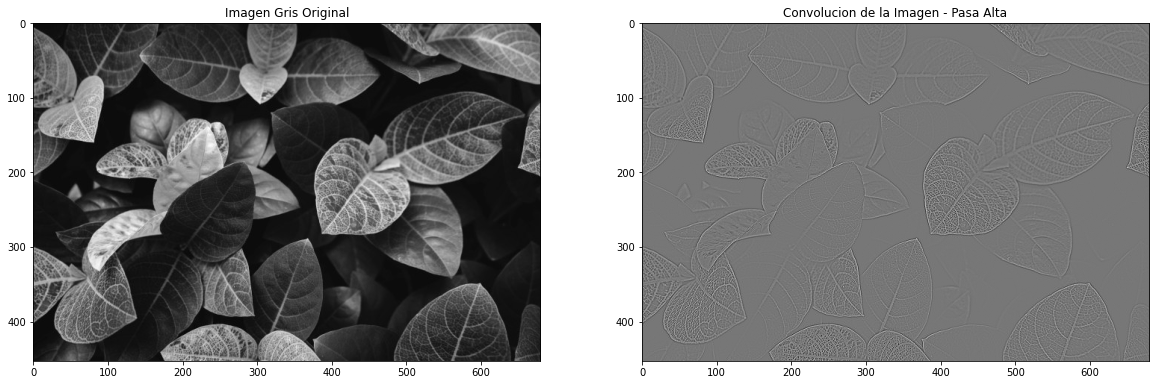

In [24]:
#@title Selecccione una Pasa Alta. { run: "auto" }
Image = "y" #@param ['y','r','g','b']
Type_Kernel = "Laplaciano V4 3x3" #@param ['Laplaciano V4 3x3','Laplaciano V8 3x3']
if Type_Kernel in 'Laplaciano V4 3x3':
  kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
elif Type_Kernel in 'Laplaciano V8 3x3':
  kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

if Image in 'y':
  image = y
elif Image in 'r':
  image = r
elif Image in 'g':
  image = g
elif Image in 'b':
  image = b

imagek = adapt_image_to_kernel(image,kernel)
imagec = convolution_image(imagek,kernel)

fig,ax = plt.subplots(1,2,figsize=(20,20))
ax[0].imshow(image,'gray')
ax[0].set_title('Imagen Gris Original')

ax[1].imshow(imagec,'gray')
ax[1].set_title('Convolucion de la Imagen - Pasa Alta')
 

### Pasa Banda

- DOG - v16 (5x5) y v28(5x5)

Text(0.5, 1.0, 'Convolução da Imagem - Passa Banda')

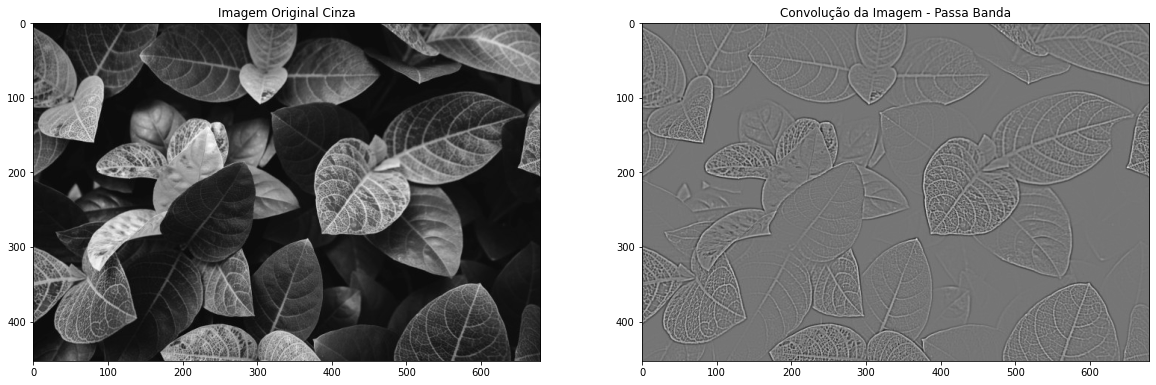

In [22]:
#@title Selecccione una Pasa Banda. { run: "auto" }
Image = "y" #@param ['y','r','g','b']
Type_Kernel = "DOG v16" #@param ['DOG v16','DOG v28']
if Type_Kernel in 'DOG v16':
  kernel = np.array([[-1,-1,-1,-1,-1],[-1,0,0,0,-1],[-1,0,16,0,-1],[-1,0,0,0,-1],[-1,-1,-1,-1,-1]])
elif Type_Kernel in 'DOG v28':
  kernel = np.array([[-1,-4,-6,-4,-1],[-4,0,8,0,-4],[-6,8,28,8,-6],[-4,0,8,0,-4],[-1,-4,-6,-4,-1]])

if Image in 'y':
  image = y
elif Image in 'r':
  image = r
elif Image in 'g':
  image = g
elif Image in 'b':
  image = b

imagek = adapt_image_to_kernel(image,kernel)
imagec = convolution_image(imagek,kernel)

fig,ax = plt.subplots(1,2,figsize=(20,20))
ax[0].imshow(image,'gray')
ax[0].set_title('Imagem Original Cinza')

ax[1].imshow(imagec,'gray')
ax[1].set_title('Convolução da Imagem - Passa Banda')


## Análisis de resultados:
- El uso de la Técnica de Convolución, con kernels de 3x3, 5x5 y 7x7, tiene su eficacia limitada al tamaño de la imagen. Funciona bien en tamaños (453, 680), pero no muestra resultados satisfactorios, tanto para banda baja como alta, en imágenes con tamaño (3456, 5184).
- El uso de imágenes de desenfilado de paso bajo
- El uso de paso alto discretiza concordancias que presentan variación de luminancia
- El uso de pases de banda mejora el descrédito del paso alto, dejándolo más nítido y con mayor cantidad de contornos en la imagen de covolución.